# Libraries

In [1]:
import pandas as pd
from pandas import get_dummies
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Data Exploration

In [2]:
data_aps = pd.read_csv('train.csv')
data_aps

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
data_aps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [4]:
data_aps.satisfaction.value_counts() #checking the dependent variable distribution 

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [5]:
data_aps.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

### Treating Missing Values

In [6]:
# Calculate the mean and median of the column for reference
mean_value = data_aps['Arrival Delay in Minutes'].mean()
median_value = data_aps['Arrival Delay in Minutes'].median()
mean_value, median_value

(15.178678301832152, 0.0)

In [7]:
# Imputing median_value in the missing entries
# Perform median imputation for the missing values
data_aps['Arrival Delay in Minutes'].fillna(median_value, inplace=True)

# Verify if all missing values are handled
data_aps.isnull().sum()['Arrival Delay in Minutes']

/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_42273/799794290.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_aps['Arrival Delay in Minutes'].fillna(median_value, inplace=True)


0

## Data Cleaning

In [8]:
# Dropping irrelevant columns, missing values and removing passengers with < 18 years age
data_aps_cleaned = data_aps.drop(columns=['Unnamed: 0', 'id']).dropna()
data_aps_cleaned = data_aps_cleaned[data_aps_cleaned['Age'] >= 18]

In [9]:
# Display the shape and first few rows of the cleaned data
data_aps_cleaned.shape, data_aps_cleaned.head()

((95973, 23),
    Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
 1    Male  disloyal Customer   25  Business travel  Business              235   
 2  Female     Loyal Customer   26  Business travel  Business             1142   
 3  Female     Loyal Customer   25  Business travel  Business              562   
 4    Male     Loyal Customer   61  Business travel  Business              214   
 5  Female     Loyal Customer   26  Personal Travel       Eco             1180   
 
    Inflight wifi service  Departure/Arrival time convenient  \
 1                      3                                  2   
 2                      2                                  2   
 3                      2                                  5   
 4                      3                                  3   
 5                      3                                  4   
 
    Ease of Online booking  Gate location  ...  Inflight entertainment  \
 1                       3      

In [10]:
data_aps_cleaned

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


# Label Encoding (One Hot Encoding)

In [11]:
# Apply one-hot encoding to categorical columns
data_aps_encoded = pd.get_dummies(data_aps_cleaned, drop_first=True)

# Display the first few rows of the transformed dataset
data_aps_encoded.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,True,True,False,False,False,False
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,False,False,False,False,False,True
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,False,False,False,False,False,False
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,True,False,False,False,False,True
5,26,1180,3,4,2,1,1,2,1,1,...,4,1,0,0.0,False,False,True,True,False,False


# Splitting train/test

In [12]:
target_column = 'satisfaction_satisfied'

In [13]:
# Splitting the features
X_train = data_aps_encoded.drop(columns=[target_column]) # features
y_train = data_aps_encoded[target_column] # label

In [14]:
print(y_train.value_counts())

satisfaction_satisfied
False    52248
True     43725
Name: count, dtype: int64


In [15]:
X_train

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
1,25,235,3,2,3,3,1,3,1,1,...,1,4,1,1,6.0,True,True,False,False,False
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,5,0,0.0,False,False,False,False,False
3,25,562,2,5,5,5,2,2,2,2,...,1,4,2,11,9.0,False,False,False,False,False
4,61,214,3,3,3,3,4,5,5,3,...,3,3,3,0,0.0,True,False,False,False,False
5,26,1180,3,4,2,1,1,2,1,1,...,4,4,1,0,0.0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,...,2,3,2,3,0.0,False,True,False,True,False
103900,49,2347,4,4,4,4,2,4,5,5,...,5,5,4,0,0.0,True,False,False,False,False
103901,30,1995,1,1,1,3,4,1,5,4,...,5,5,4,7,14.0,True,True,False,False,False
103902,22,1000,1,1,1,5,1,1,1,1,...,5,4,1,0,0.0,False,True,False,True,False


In [16]:
# Display the sizes of the splits
X_train.shape, y_train.shape

((95973, 23), (95973,))

# ML Algorithm: Decision Tree

## Training

In [17]:
# Initialize the Decision Tree model
base_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
base_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Test Data

In [18]:
data_test = pd.read_csv('test.csv')
data_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [19]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [20]:
# Dropping irrelevant columns, removing missing values, and filtering age >= 18
test_data_cleaned = data_test.drop(columns=['Unnamed: 0', 'id']).dropna()
test_data_cleaned = test_data_cleaned[test_data_cleaned['Age'] >= 18]

In [21]:
# Display the shape and the first few rows of the cleaned test dataset
test_data_cleaned.shape, test_data_cleaned.head()

((23983, 23),
    Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
 0  Female     Loyal Customer   52  Business travel       Eco              160   
 1  Female     Loyal Customer   36  Business travel  Business             2863   
 2    Male  disloyal Customer   20  Business travel       Eco              192   
 3    Male     Loyal Customer   44  Business travel  Business             3377   
 4  Female     Loyal Customer   49  Business travel       Eco             1182   
 
    Inflight wifi service  Departure/Arrival time convenient  \
 0                      5                                  4   
 1                      1                                  1   
 2                      2                                  0   
 3                      0                                  0   
 4                      2                                  3   
 
    Ease of Online booking  Gate location  ...  Inflight entertainment  \
 0                       3      

In [22]:
test_data_cleaned.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Label Encoding the test data

In [33]:
# Apply one-hot encoding to the test dataset
test_data_encoded = pd.get_dummies(test_data_cleaned, drop_first=True)

# Ensure columns match between training and test datasets (if necessary, align them)
test_data_encoded = test_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Split features and target for the test dataset
X_test = test_data_encoded
y_test = test_data_cleaned['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

# In order to decode later
label_mapping = {1: 'satisfied', 0: 'neutral or dissatisfied'}

# Display the shapes of test features and target
X_test.shape, y_test.shape

((23983, 23), (23983,))

In [24]:
X_test

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,2,5,5,50,44.0,False,False,False,True,False
1,36,2863,1,1,3,1,5,4,5,4,...,3,4,5,0,0.0,False,False,False,False,False
2,20,192,2,0,2,4,2,2,2,2,...,2,2,2,0,0.0,True,True,False,True,False
3,44,3377,0,0,0,2,3,4,4,1,...,3,1,4,0,6.0,True,False,False,False,False
4,49,1182,2,3,4,3,4,1,2,2,...,4,2,4,0,20.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,52,280,3,3,3,3,3,4,4,4,...,3,4,3,0,0.0,True,False,False,False,False
25970,36,432,1,5,1,3,4,1,4,4,...,2,3,4,0,0.0,False,True,False,True,False
25971,34,526,3,3,3,1,4,3,4,4,...,4,5,4,0,0.0,True,True,False,False,False
25972,23,646,4,4,4,4,4,4,4,4,...,5,5,4,0,0.0,True,False,False,False,False


In [25]:
y_test

0        1
1        1
2        0
3        1
4        1
        ..
25969    1
25970    0
25971    0
25972    1
25975    0
Name: satisfaction, Length: 23983, dtype: int64

## Evaluation

In [26]:
# Evaluate the Base Model on the Test Set
y_test_pred_base = base_model.predict(X_test)
y_test_pred_proba_base = base_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

print("Base Model Test Evaluation (Airline Passenger Satisfaction):")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_base))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_base))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred_base))

Base Model Test Evaluation (Airline Passenger Satisfaction):
Test Accuracy: 0.946920735520994

Test Confusion Matrix:
 [[12316   648]
 [  625 10394]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     12964
           1       0.94      0.94      0.94     11019

    accuracy                           0.95     23983
   macro avg       0.95      0.95      0.95     23983
weighted avg       0.95      0.95      0.95     23983



# Fine-Tuning

In [27]:
# Define the hyperparameter grid for fine-tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model from grid search
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


## Evaluation

In [28]:
y_test_pred_best = best_model.predict(X_test)
y_test_pred_proba_best = best_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

print("\nFine-Tuned Model Test Evaluation (Airline Passenger Satisfaction):")
print("Best Hyperparameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_best))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_best))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred_best))


Fine-Tuned Model Test Evaluation (Airline Passenger Satisfaction):
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}
Test Accuracy: 0.9519242796981195

Test Confusion Matrix:
 [[12507   457]
 [  696 10323]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     12964
           1       0.96      0.94      0.95     11019

    accuracy                           0.95     23983
   macro avg       0.95      0.95      0.95     23983
weighted avg       0.95      0.95      0.95     23983



### Label Decoding

In [29]:
label_mapping = {1: 'satisfied', 0: 'neutral or dissatisfied'}
y_test_pred_best_text = [label_mapping[pred] for pred in y_test_pred_best]

# Convert the list to a pandas Series to use .value_counts()
y_test_pred_text_series = pd.Series(y_test_pred_best_text)

print(y_test_pred_best_text[:10])

# Display the count of each category
print(y_test_pred_text_series.value_counts())

['satisfied', 'satisfied', 'neutral or dissatisfied', 'satisfied', 'neutral or dissatisfied', 'satisfied', 'satisfied', 'satisfied', 'satisfied', 'neutral or dissatisfied']
neutral or dissatisfied    13203
satisfied                  10780
Name: count, dtype: int64


### Prediction Insight
As per the predictive model, there are 13,203 neutral or dissatisfied customers in comparison with 10,780 satisfied customers

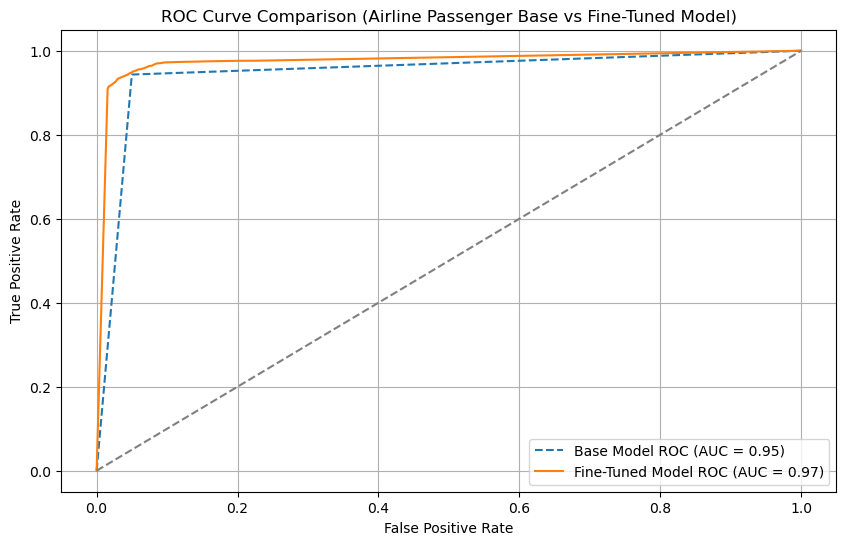

In [30]:
# Compare ROC Curves for Base Model and Fine-Tuned Model
fpr_base, tpr_base, _ = roc_curve(y_test, y_test_pred_proba_base)
roc_auc_base = auc(fpr_base, tpr_base)

fpr_best, tpr_best, _ = roc_curve(y_test, y_test_pred_proba_best)
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure(figsize=(10, 6))
plt.plot(fpr_base, tpr_base, label=f'Base Model ROC (AUC = {roc_auc_base:.2f})', linestyle='--')
plt.plot(fpr_best, tpr_best, label=f'Fine-Tuned Model ROC (AUC = {roc_auc_best:.2f})', linestyle='-')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Airline Passenger Base vs Fine-Tuned Model)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

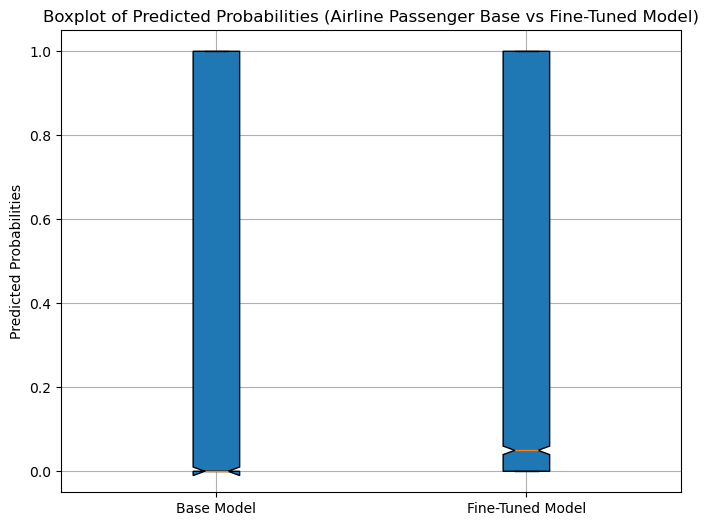

In [31]:
# Visualize Predicted Probabilities with Boxplots
data = [y_test_pred_proba_base, y_test_pred_proba_best]

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=['Base Model', 'Fine-Tuned Model'], patch_artist=True, notch=True)
plt.ylabel('Predicted Probabilities')
plt.title('Boxplot of Predicted Probabilities (Airline Passenger Base vs Fine-Tuned Model)')
plt.grid()
plt.show()

The null hypothesis, stating no significant difference in predictive performance between the base and fine-tuned decision tree models for the Airline Passenger dataset, is rejected. The fine-tuned model demonstrated an improved AUC (0.97 vs. 0.95), enhanced recall for both classes, and a slightly higher overall accuracy (95.2% vs. 94.6%). These results confirm that hyperparameter tuning positively impacts the decision tree model’s ability to predict airline passenger satisfaction with greater precision and reliability.

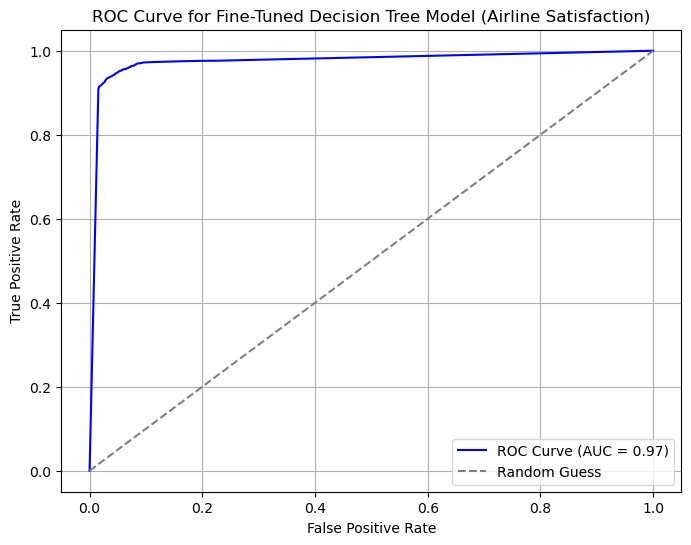

In [32]:
# Calculate probabilities for the ROC curve
y_test_proba_best = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_test_proba_best)
roc_auc_best = roc_auc_score(y_test, y_test_proba_best)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='blue', label=f"ROC Curve (AUC = {roc_auc_best:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Fine-Tuned Decision Tree Model (Airline Satisfaction)")
plt.legend(loc="lower right")
plt.grid()
plt.show()